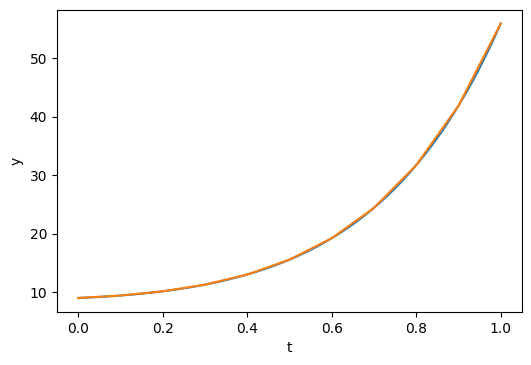

StateSpaceContinuous(
array([[1., 2.],
       [0., 3.]]),
array([[0.],
       [1.]]),
array([[2., 1.]]),
array([[3.]]),
dt: None
)
StateSpaceDiscrete(
array([[1.10517092, 0.24468789],
       [0.        , 1.34985881]]),
array([[0.01144868],
       [0.1166196 ]]),
array([[2., 1.]]),
array([[3.]]),
dt: 0.1
)


In [1]:
import numpy as np
from scipy.signal import StateSpace, lsim, dlsim
import matplotlib.pyplot as plt

# define the continouse time linear system
A = np.array([[1.0, 2.0], [0.0, 3.0]]) # need to use float number not integer, a bug of this package
B = np.array([[0.0], [1.0]])
C = np.array([[2.0, 1.0]])
D = np.array([[3.0]])

example_sys_ct = StateSpace(A, B, C, D)

# define simulation steps in time
t_ct = np.linspace(0, 1, num=1000)

# define control input
u_ct = np.ones(t_ct.size)*3

# convert to discrete time
T = 0.1 # second
t_dt = np.linspace(0, 1, num=11)
u_dt = np.ones(t_dt.size)*3
example_sys_dt = example_sys_ct.to_discrete(T)


# simulate the system
_, y_ct, x_ct = lsim(example_sys_ct, u_ct, t_ct, X0 = [0.,0.])
t_dt, y_dt, x_dt = dlsim(example_sys_dt, u_dt, t_dt,  x0 = [0.,0.])
# plot
plt.figure(dpi=100)
plt.plot(t_ct, y_ct)
plt.plot(t_dt, y_dt)
plt.ylabel('y')
plt.xlabel('t')
plt.show()

print(example_sys_ct)
print(example_sys_dt)


